In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
X_train= pd.read_csv('/Users/emilydanielbowser/Documents/Iowa Food Coop/Data/Final Data/X_train')
y_train= pd.read_csv('/Users/emilydanielbowser/Documents/Iowa Food Coop/Data/Final Data/y_train')
X_val= pd.read_csv('/Users/emilydanielbowser/Documents/Iowa Food Coop/Data/Final Data/X_val')
y_val= pd.read_csv('/Users/emilydanielbowser/Documents/Iowa Food Coop/Data/Final Data/y_val')
X_test= pd.read_csv('/Users/emilydanielbowser/Documents/Iowa Food Coop/Data/Final Data/X_test')
y_test= pd.read_csv('/Users/emilydanielbowser/Documents/Iowa Food Coop/Data/Final Data/y_test')

In [3]:
cols = X_train.columns

In [4]:
rolling_8_train = X_train['dumb_pred_8']
rolling_8_val = X_val['dumb_pred_8']
rolling_8_test = X_test['dumb_pred_8']

rolling_8_train_val = pd.concat([rolling_8_train,rolling_8_val])

In [5]:
metrics_df = pd.read_csv('metrics')

In [6]:
metrics_df.drop('Unnamed: 0', axis=1, inplace = True)

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

In [8]:
# Concatenate the training and validation sets
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

# Create the predefined validation set indices
val_indices = [-1] * len(X_train) + [0] * len(X_val)
ps = PredefinedSplit(test_fold=val_indices)

In [251]:
#Setting parameters to search through.
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 400, 800]}
xgbr = xgb.XGBRegressor(seed = 42)
#Ranomized search for best hyperparameters.
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=50,
                         cv=ps,
                         verbose=1)

In [43]:
clf.fit(X_train_val,y_train_val)

Fitting 1 folds for each of 50 candidates, totalling 50 fits


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 400, 800],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=1)

In [ ]:
xgb_best_params = clf.best_params_
xgb_best_model = clf.best_estimator_
print(xgb_best_params)

In [10]:
xgb_best_params = {'subsample': 0.7999999999999999, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.4}

In [47]:
print(xgb_best_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.4, colsample_bynode=None, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [11]:
best_xgb = xgb.XGBRegressor(**xgb_best_params)

In [12]:
X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train, y_val])

In [13]:
best_xgb.fit(X_train_val,y_train_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.4, colsample_bynode=None, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [14]:
train_val_preds = best_xgb.predict(X_train_val)

In [15]:
val_train_xgb_mae = mean_absolute_error(y_train_val,train_val_preds)
val_train_xgb_rmse = np.sqrt(mean_squared_error(y_train_val,train_val_preds))

print(val_train_xgb_mae,val_train_xgb_rmse)

19.010114175373406 34.41428044116922


In [17]:
test_preds = best_xgb.predict(X_test)
test_xgb_mae = mean_absolute_error(y_test,test_preds)
test_xgb_rmse = np.sqrt(mean_squared_error(y_test,test_preds))
print(test_xgb_mae, test_xgb_rmse)

13.060160091230639 25.150449690961715


In [18]:
train_val_preds_df  = pd.DataFrame(train_val_preds).reset_index(drop=True)
rolling_8_train_val_df = pd.DataFrame(rolling_8_train_val).reset_index(drop=True)
train_val_preds_df.index.name='Index'
rolling_8_train_val_df.index.name='Index'

In [19]:
rolling_8_train_val_df.head(-5)

,dumb_pred_8
Index,
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
37758,47.656667
37759,19.483333
37760,53.913333


In [20]:
train_val_preds_df = train_val_preds_df.join(rolling_8_train_val_df, how='left', on = 'Index')

In [21]:
train_val_preds_df.head()

,0,dumb_pred_8
Index,,
0,26.050968,0.0
1,16.098558,0.0
2,10.706353,0.0
3,10.706353,0.0
4,10.706353,0.0


In [22]:
train_val_preds_df.columns

Index([0, 'dumb_pred_8'], dtype='object')

In [23]:
train_val_preds_df.rename(columns={0:"xgb_pred"}, inplace=True)

In [24]:
train_val_preds_df['mixed_pred'] = train_val_preds_df['xgb_pred'].where(train_val_preds_df['dumb_pred_8'] != 0, 0)

In [25]:
train_val_preds_df.head()

,xgb_pred,dumb_pred_8,mixed_pred
Index,,,
0,26.050968,0.0,0.0
1,16.098558,0.0,0.0
2,10.706353,0.0,0.0
3,10.706353,0.0,0.0
4,10.706353,0.0,0.0


In [26]:
mixed_train_val_preds = np.array(train_val_preds_df['mixed_pred'])

In [27]:
val_train_mixed_mae = mean_absolute_error(y_train_val,mixed_train_val_preds)
val_train_mixed_rmse = np.sqrt(mean_squared_error(y_train_val,mixed_train_val_preds))

print(val_train_mixed_mae,val_train_mixed_rmse)

17.404514878906454 35.14401337499518


In [28]:
mixed_test_preds_df  = pd.DataFrame(test_preds).reset_index(drop=True)
rolling_8_test_df = pd.DataFrame(rolling_8_test).reset_index(drop=True)
mixed_test_preds_df.index.name='Index'
rolling_8_test_df.index.name='Index'

In [29]:
mixed_test_preds_df = mixed_test_preds_df.join(rolling_8_test_df, how='left', on = 'Index')
mixed_test_preds_df.rename(columns={0:"xgb_pred"}, inplace=True)

In [30]:
mixed_test_preds_df['mixed_pred'] = mixed_test_preds_df['xgb_pred'].where(mixed_test_preds_df['dumb_pred_8'] != 0, 0)
mixed_test_preds_df.head()

,xgb_pred,dumb_pred_8,mixed_pred
Index,,,
0,6.085443,16.875,6.085443
1,5.210416,16.875,5.210416
2,3.903557,0.000,0.000000
3,3.903557,0.000,0.000000
4,3.903557,0.000,0.000000


In [31]:
mixed_test_preds = np.array(mixed_test_preds_df['mixed_pred'])

In [32]:
test_mixed_mae = mean_absolute_error(y_test,mixed_test_preds)
test_mixed_rmse = np.sqrt(mean_squared_error(y_test,mixed_test_preds))

print(test_mixed_mae,test_mixed_rmse)

10.883818206550954 25.082406841591983


In [33]:
metrics_mixed_xgb = pd.Series({'Model': 'Mixed XGB & Rolling 8', 
               'Train MAE': 0,
               'Train_Val MAE': val_train_mixed_mae,
               'Test MAE': test_mixed_mae,
               'Train RMSE': 0, 
               'Train_Val RMSE': val_train_mixed_rmse,
               'Test RMSE': test_mixed_rmse
               })

In [34]:
metrics_xgb = pd.Series({'Model': 'XGBoost', 
               'Train MAE': 0,
               'Train_Val MAE': val_train_xgb_mae,
               'Test MAE': test_xgb_mae,
               'Train RMSE': 0, 
               'Train_Val RMSE': val_train_xgb_rmse,
               'Test RMSE': test_xgb_rmse
               })

In [35]:
metrics_xgb_df = pd.DataFrame(metrics_xgb)
metrics_xgb_df = metrics_xgb_df.T
metrics_mixed_xgb_df = pd.DataFrame(metrics_mixed_xgb)
metrics_mixed_xgb_df = metrics_mixed_xgb_df.T


In [36]:
metrics_df = pd.concat([metrics_df, metrics_xgb_df,metrics_mixed_xgb_df])

In [37]:
metrics_df

,Model,Train MAE,Train_Val MAE,Test MAE,Train RMSE,Train_Val RMSE,Test RMSE
0,Rolling_4,19.567186,18.492594,11.202351,39.346192,37.96231,26.97104
1,Rolling_6,19.716208,18.650735,11.077757,38.632431,37.270417,25.967808
2,Rolling_8,20.003171,18.901533,11.182183,38.486394,37.105224,25.787907
3,Random Forest,17.024912,16.150388,12.655346,30.682197,29.770393,25.461688
4,Mixed RF and Rolling 8,0.0,15.062071,11.193987,0.0,31.171034,25.508658
0,XGBoost,0,19.010114,13.06016,0,34.41428,25.15045
0,Mixed XGB & Rolling 8,0,17.404515,10.883818,0,35.144013,25.082407


In [38]:
metrics_df.head(10)

,Model,Train MAE,Train_Val MAE,Test MAE,Train RMSE,Train_Val RMSE,Test RMSE
0,Rolling_4,19.567186,18.492594,11.202351,39.346192,37.96231,26.97104
1,Rolling_6,19.716208,18.650735,11.077757,38.632431,37.270417,25.967808
2,Rolling_8,20.003171,18.901533,11.182183,38.486394,37.105224,25.787907
3,Random Forest,17.024912,16.150388,12.655346,30.682197,29.770393,25.461688
4,Mixed RF and Rolling 8,0.0,15.062071,11.193987,0.0,31.171034,25.508658
0,XGBoost,0,19.010114,13.06016,0,34.41428,25.15045
0,Mixed XGB & Rolling 8,0,17.404515,10.883818,0,35.144013,25.082407


In [39]:
metric_types = ['Train MAE', 'Train_Val MAE', 'Test MAE', 'Train RMSE', 'Train_Val RMSE', 'Test RMSE']

reshaped_data = []

# Iterate over each row in the DataFrame
for index, row in metrics_df.iterrows():
    model = row['Model']
    for metric_type in metric_types:
        value = row[metric_type]
        reshaped_data.append({'Model': model, 'Type': metric_type, 'Value': value})

# Create a new DataFrame from the reshaped data
results_df = pd.DataFrame(reshaped_data)

In [40]:
results_df.head()

,Model,Type,Value
0,Rolling_4,Train MAE,19.567186
1,Rolling_4,Train_Val MAE,18.492594
2,Rolling_4,Test MAE,11.202351
3,Rolling_4,Train RMSE,39.346192
4,Rolling_4,Train_Val RMSE,37.962310


In [41]:
results_df = results_df[(results_df['Type']!= 'Train MAE') & (results_df['Type']!= 'Train RMSE')]

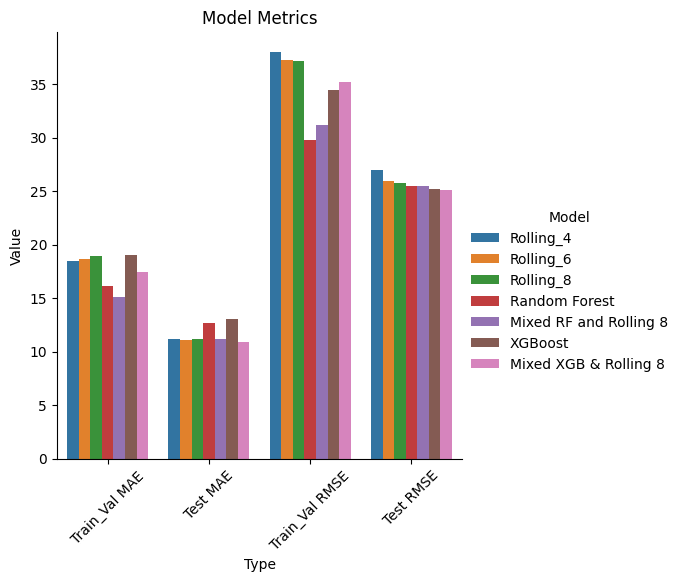

In [43]:
plot = sns.catplot(data=results_df, x= 'Type', y = 'Value', kind = 'bar', hue ='Model' )
plot.set_xticklabels(rotation=45)
plt.title("Model Metrics")
plt.savefig('Model_Metrics',bbox_inches='tight')

In [298]:
results_df[results_df['Type']=='Test RMSE'].sort_values(by="Value")

,Model,Type,Value
41,Mixed XGB & Rolling 8,Test RMSE,25.082407
35,XGBoost,Test RMSE,25.150450
23,Random Forest,Test RMSE,25.461688
29,Mixed RF and Rolling 8,Test RMSE,25.508658
17,Rolling_8,Test RMSE,25.787907
11,Rolling_6,Test RMSE,25.967808
5,Rolling_4,Test RMSE,26.971040


In [44]:
importances = best_xgb.feature_importances_

indices = np.argsort(importances)[::-1]

print('Features:')
for i in indices:
    print(X_test.columns[i], importances[i])

Features:
dumb_pred_8 0.11291542
dumb_pred_4 0.083406545
dumb_pred_6 0.074863546
order_per_cycle 0.071438305
Baked Goods_Cum 0.062359676
HowHear_Flyer or booth 0.04508701
Local Produce_Cum 0.04198962
Beverages_Cum 0.041575212
Dairy_Cum 0.033969972
Cumulative_Sum 0.032086823
Meat - Beef_Cum 0.025793927
The Garden Center_Cum 0.024801979
Meat - Pork_Cum 0.022452502
Eggs_Cum 0.021363297
Iowa Food Co-op Shop_Cum 0.019634478
Prepared Foods_Cum 0.018760294
Cumulative_Number_of_Orders 0.018437494
order_per_cycle_when_ordering 0.017912762
Float_Year_Quarter 0.017172044
Cycles_as_member 0.016231863
Meats - Other_Cum 0.01444827
Snacks_Cum 0.013070417
Years_member 0.012945883
IDCyc 0.011899612
Condiments + Sauces_Cum 0.0110067595
longitude 0.009218538
Honey, Syrups, Jams + Jellies_Cum 0.008875079
Meat - Chicken + Capon_Cum 0.008637955
Personal Care_Cum 0.007676964
Non-Food Items_Cum 0.00720377
Grains, Flours, Cereal + Pastas_Cum 0.006938977
IDMemb 0.006624496
Other Protein Sources_Cum 0.0061536683

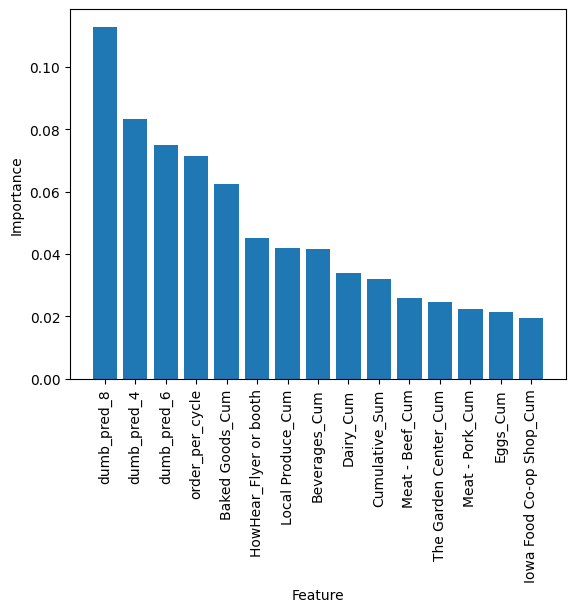

In [54]:
#plotting the importances to the xgb model.
plt.bar(range(15), importances[indices[0:15]])
plt.xticks(range(15), X_train.columns[indices][0:15], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.savefig('best_features.png', bbox_inches='tight')
plt.show()